# Kodluyoruz - Carbon Consulting Veri Bilimi Bootcamp'i 4. Hafta Notebook

Bu notebook içerisinde dimensionality reduction tekniklerini ve kullanımını göreceğiz.

## Imports

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Grafiklerin daha güzel görünmesi için
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Veriseti

In [83]:
from sklearn.datasets import load_digits

x, y = load_digits(return_X_y=True)

<Figure size 432x288 with 0 Axes>

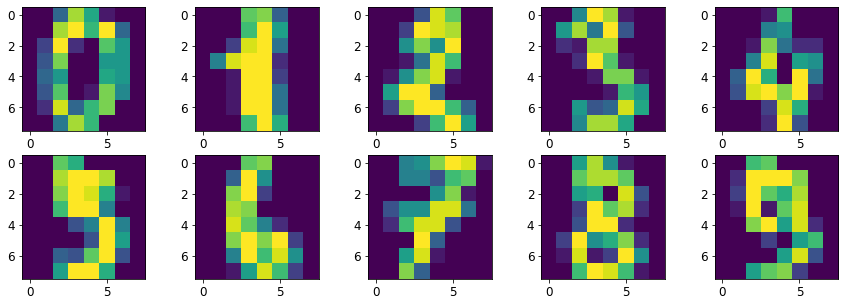

In [84]:
satir_sayisi = 2
sutun_sayisi = 5

plt.figure()
#subplot(r,c) provide the no. of rows and columns
figure, subfigures = plt.subplots(satir_sayisi, sutun_sayisi, figsize=(15, 5))

resim_index = 0
for satir in range(satir_sayisi):
    for sutun in range(sutun_sayisi):
        ornek_resim: np.ndarray = x[resim_index]
        ornek_resim = ornek_resim.reshape((8, 8))
        subfigures[satir][sutun].imshow(ornek_resim)
        resim_index+=1

## Scikit-Learn ile PCA

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(x)

In [86]:
X2D[:5]

array([[ -1.25946886,  21.27488269],
       [  7.95761151, -20.76869838],
       [  6.99192555,  -9.95598612],
       [-15.90610723,   3.33246432],
       [ 23.30687103,   4.26906157]])

```inverse_transform``` kullanarak 2 boyuta düşürdüğümüz veriyi tekrardan orjinal boyutuna çıkarabiliriz. Ancak 2 boyuta düşürme esnasında bilgi kaybı yaşadığımız için yeni çıkan resimler öncekilerin aynısı olmayacaktır.

In [87]:
X3D = pca.inverse_transform(X2D)

<Figure size 432x288 with 0 Axes>

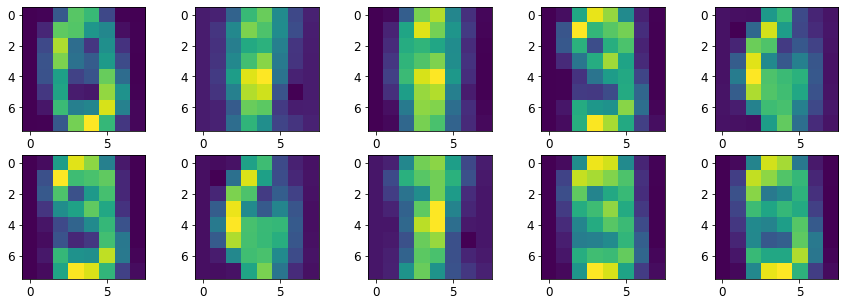

In [88]:
satir_sayisi = 2
sutun_sayisi = 5

plt.figure()
#subplot(r,c) provide the no. of rows and columns
figure, subfigures = plt.subplots(satir_sayisi, sutun_sayisi, figsize=(15, 5))

resim_index = 0
for satir in range(satir_sayisi):
    for sutun in range(sutun_sayisi):
        ornek_resim: np.ndarray = X3D[resim_index]
        ornek_resim = ornek_resim.reshape((8, 8))
        subfigures[satir][sutun].imshow(ornek_resim)
        resim_index+=1

Kaybedilen veri miktarını görmek için ise orjinal resim ile yeniden oluşturulmuş arasında resmin farkının karelerinin toplamının ortalamasını alıyoruz.

In [89]:
# Farkların karesini aldık ki negatif fark olmasın
np.mean(np.sum(np.square(X3D - x), axis=1))

858.9447808487415

In [90]:
pca.components_

array([[ 7.59885942e-18, -1.73094641e-02, -2.23428834e-01,
        -1.35913317e-01, -3.30323014e-02, -9.66340822e-02,
        -8.32944403e-03,  2.26899913e-03, -3.20516383e-04,
        -1.19308893e-01, -2.44451674e-01,  1.48512722e-01,
        -4.67319609e-02, -2.17740757e-01, -1.48136823e-02,
         4.47779422e-03, -4.94136215e-05, -7.95419226e-02,
         8.33951509e-02,  2.15915325e-01, -1.72126797e-01,
        -1.63712100e-01,  2.86444462e-02,  4.23251804e-03,
         9.85488622e-05,  6.42319228e-02,  2.54093321e-01,
        -3.56771087e-02, -2.09462549e-01, -4.31311343e-02,
         5.13118672e-02,  2.13422737e-04,  0.00000000e+00,
         1.59950892e-01,  3.68690763e-01,  1.64406820e-01,
         8.52007946e-02,  3.72982842e-02,  2.15866940e-02,
         0.00000000e+00,  1.28865615e-03,  1.06945300e-01,
         3.03067469e-01,  2.47813059e-01,  2.09637304e-01,
         1.22325224e-02, -3.69458611e-02,  1.61484983e-03,
         6.93023695e-04, -8.35143638e-03, -5.58598867e-0

Explanined varience ratio, her bir component'in bize ne kadar bilgi verdiğini gösterir. Buradaki değerlerin toplamı ne kadar büyükse o kadar iyi.

In [91]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [92]:
1 - pca.explained_variance_ratio_.sum()

0.7149063517630146

Eğer amaç görselleştirme değil de verinin boyut sayısını düşürmek ise, n_component sayısına nasıl karar verebiliriz?

In [93]:
# n_component değerini boş bırakıyoruz.
pca = PCA()
pca.fit(x)
pca.components_

array([[-1.77484909e-19, -1.73094651e-02, -2.23428835e-01, ...,
        -8.94184677e-02, -3.65977111e-02, -1.14684954e-02],
       [ 3.27805401e-18, -1.01064569e-02, -4.90849204e-02, ...,
         1.76697117e-01,  1.94547053e-02, -6.69693895e-03],
       [-1.68358559e-18,  1.83420720e-02,  1.26475543e-01, ...,
         2.32084163e-01,  1.67026563e-01,  3.48043832e-02],
       ...,
       [ 0.00000000e+00,  1.67514643e-16,  2.53187696e-16, ...,
        -1.66533454e-16,  5.55111512e-17, -1.11022302e-16],
       [ 0.00000000e+00,  4.60348075e-17,  1.59741619e-16, ...,
        -4.52112306e-17,  1.38561038e-16, -7.27228607e-17],
       [ 1.00000000e+00, -1.68983002e-17,  5.73338351e-18, ...,
         8.66631300e-18, -1.57615962e-17,  4.07058917e-18]])

In [94]:
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [95]:
# Buradan istedigimiz orandaki varyans değerini seçebiliriz. Mesela n_components = 28 dersek verideki varyansın %95'ini korumuş oluyoruz üstelik verinin boyutu yarıya inmiş oluyor.
np.cumsum(pca.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

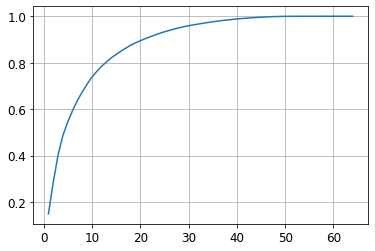

In [96]:
pca = PCA()
pca.fit(x)
cumsum_data = np.cumsum(pca.explained_variance_ratio_)
x_tick = np.arange(1,len(cumsum_data)+1, 1)
plt.grid(True)
plt.plot(x_tick, cumsum_data)

In [97]:
# Kısayol
pca = PCA(n_components=0.95)
pca.fit(x)
pca.components_

array([[-1.77484909e-19, -1.73094651e-02, -2.23428835e-01, ...,
        -8.94184677e-02, -3.65977111e-02, -1.14684954e-02],
       [ 3.27805401e-18, -1.01064569e-02, -4.90849204e-02, ...,
         1.76697117e-01,  1.94547053e-02, -6.69693895e-03],
       [-1.68358559e-18,  1.83420720e-02,  1.26475543e-01, ...,
         2.32084163e-01,  1.67026563e-01,  3.48043832e-02],
       ...,
       [ 1.33815481e-17,  8.24410330e-03,  1.42774093e-01, ...,
        -1.07466629e-02,  3.38995330e-01,  1.58789644e-01],
       [-3.84384960e-18,  9.17016581e-03,  4.17946439e-02, ...,
         1.30708382e-01, -1.34487279e-02,  2.11313565e-02],
       [-4.85442521e-18,  1.79906763e-03, -4.74972508e-02, ...,
         3.01741290e-02,  8.16530266e-02,  5.93242720e-02]])

In [98]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

## Diğer Boyut Düşürme Teknikleri


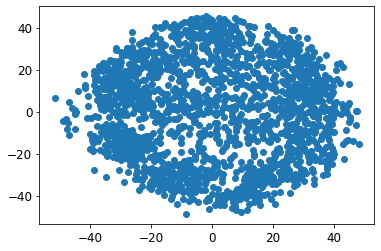

In [100]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X2D = mds.fit_transform(x)
plt.scatter(X2D[:,0], X2D[:,1])
plt.show()

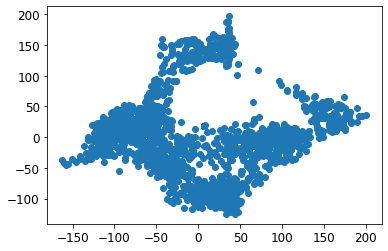

In [101]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X2D = isomap.fit_transform(x)
plt.scatter(X2D[:,0], X2D[:,1])
plt.show()

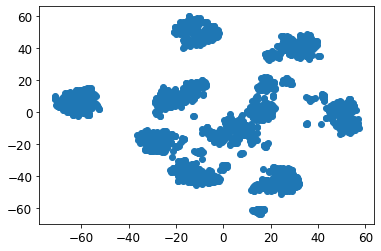

In [106]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X2D = tsne.fit_transform(x)
plt.scatter(X2D[:,0], X2D[:,1])
plt.show()

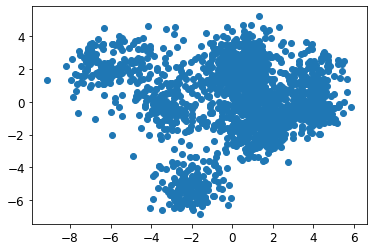

In [104]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X2D = lda.fit_transform(x,y)
plt.scatter(X2D[:,0], X2D[:,1])
plt.show()

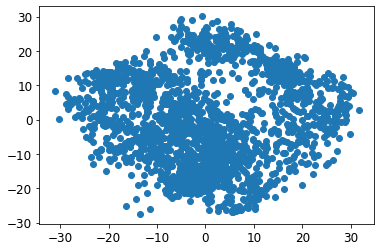

In [110]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(x,y)
plt.scatter(X2D[:,0], X2D[:,1])
plt.show()

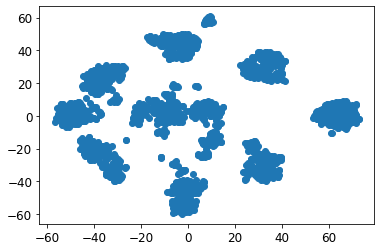

In [113]:
"""
TSNE yavaş çalışan bir algoritmadır ve boyut sayısı arttıkça çalışma süresi de uzar.
Aşağıdaki yazı sklearn dökümantasyonundan alıntıdır ve eğer dimension sayısı çok yüksek ise
PCA gibi algoritmalarla boyut sayısı yaklaşık 50'ye düşürüldükten sonra t-SNE kullanılmasını
önerir.

It is highly recommended to use another dimensionality reduction
    method (e.g. PCA for dense data or TruncatedSVD for sparse data)
    to reduce the number of dimensions to a reasonable amount (e.g. 50)
    if the number of features is very high. This will suppress some
    noise and speed up the computation of pairwise distances between
    samples. For more tips see Laurens van der Maaten's FAQ [2].
"""
pca = PCA(n_components=0.99)
X_reduced = pca.fit_transform(x,y)

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X2D = tsne.fit_transform(X_reduced)
plt.scatter(X2D[:,0], X2D[:,1])
plt.show()

## Ödev

Bu hafta ödev olarak ise sizden bir "Veri Seti Okuma/Oluşturma Class'ı" yazmanızı istiyoruz. Bunu yaparken hem Python bilgilerinizi pekiştirmenizi hem de bu hafta işlediklerimizi kullanmanızı bekliyor olacağız. 

Yapmanız gerekenler:
- "DataOperations" adlı bir class oluşturmanız.
- Bu class'ta şunların olmasını bekliyoruz:
  - Eğer class oluşturulurken bir numpy array'i verilirse bunu pandas dataframe'ine çevirerek kaydetmesi,
  - Eğer bir path verilirse, ve bu path'de csv ya da json dosyası varsa bunu veriyi bir pandas dataframe'ine kaydetmesi,
  - Eğer direk olarak pandas dataframe'i verilirse de herhangi bir değişiklik yapmadan kaydetmesi,
  - Eğer herhangi bir değer verilmeden class oluşturulursa, rastgele bir veri seti oluşturmanız gerekmekte.
  - Class oluşturulduktan sonra ise bu veri üzerine analiz çıkartabilecek fonksiyonlar yazmanızı bekliyoruz:
    - Her sütundaki veri sayısı ve tipi, eğer sayısal veriler varsa standart sapma, ortalama gibi istatistiksel değerlerini veren bir fonksiyon,
    - Sayısal veriler içeren sütunların görselleştirilmesi.
- Tüm fonksiyonlara ve ana class içeriğine `Docstring`lerini yazmaya, isimlendirmeleri Python kurallarına göre yapmaya dikkat etmeye çalışın lütfen.

'jt' is not recognized as an internal or external command,
operable program or batch file.
